In [ ]:
pwd

In [ ]:
cd C:\Users\Abhishek\Downloads

### Question that can analyised from this data set
 1.Movies which had most and least profit<br>
 2.Movies with largest and lowest budget<br>
 3.Movies with most and least earned revenu<br>
 4.Movies with longest and shortest runtime values<br>
 5.Average runtime of all the movies<br>
 6.IN which year we had most no of profitable movies<br>
 7.Successful genres(with respect to the profitablity of the movie)<br>
 8.Most frequent cast(with respect to the profitability of the movie)<br>
 9.Average budget(with respect to the profitability of the movie)<br>
 10.Average revenue(with respect to the profitability of the movie)<br>
 11.average duration of the movie(with respect to the profitability of the movie)<br>

In [65]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv("tmdb-movies.csv")
#data.head()
print(data.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [6]:
#creating a list of column to be deleted
list_del=['id','imdb_id','popularity','homepage','overview','production_companies','vote_count','vote_average','keywords',
          'budget_adj','revenue_adj']
data=data.drop(list_del,1)
#print(data.dtypes)
#print(data.head(3))

In [7]:
#Removing the duplicates row
rows,col=data.shape
print("total number of rows and columns are {} and {} respectively in the dataset".format(rows,col))
data.drop_duplicates(keep='first',inplace=True)
rows,col=data.shape
print("After deleting the duplicates rows total number of rows and columns are {} and {} ".format(rows,col))

total number of rows and columns are 10866 and 10 respectively in the dataset
After deleting the duplicates rows total number of rows and columns are 10865 and 10 


In [8]:
#Removing 0's from revenue and budget ciloumn

#below two line replace all the 0's of budget and revenue column with NAN value
remove_list=['revenue','budget']
data[remove_list]=data[remove_list].replace(0,np.NAN)
#removing all the rows which contain contain NAN value either in budget or in revenue column 
data.dropna(subset=remove_list,inplace=True)
print(data.shape)

(3854, 10)


In [9]:
#Changing the release date column into standard date format
data.release_date=pd.to_datetime(data['release_date'])
print(data['release_date'].dtypes)

datetime64[ns]


In [10]:
#Replacing 0's value with NAN value from runtime column
data['runtime']=data['runtime'].replace(0,np.NAN)

In [11]:
#Changing the datatype of revenue and budget column 
print(data.dtypes)
chg_list=['budget','revenue']
data[chg_list]=data[chg_list].applymap(np.int)
print(data.dtypes)

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object


In [12]:
#Inserting a new column profit in this dataset
data.insert(2,'profit',data['revenue']-data['budget'])
#print(data.dtypes)
print(data.head(3))

      budget     revenue      profit      original_title  \
0  150000000  1513528810  1363528810      Jurassic World   
1  150000000   378436354   228436354  Mad Max: Fury Road   
2  110000000   295238201   185238201           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                      tagline  runtime  \
0           The park is open.      124   
1          What a Lovely Day.      120   
2  One Choice Can Destroy You      119   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
1  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
2         Adventure|Science Fiction|Thriller   2015-03-18          2015

In [13]:
print(data['profit'].idxmax())



1386


In [14]:
import pprint
def calculate(pro):
    highest=data[pro].idxmax()
    print(highest)
    highest_detail=pd.DataFrame(data.loc[highest])
    lowest=data[pro].idxmin()
    lowest_detail=pd.DataFrame(data.loc[lowest])
   # collection of data in one frame
    sets=pd.concat([highest_detail,lowest_detail],axis=1)
    return(sets)


In [15]:
#Movies which had most and least profit
calculate('profit')

1386


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


In [16]:
#Movies with largest and lowest budget
calculate('budget')

2244


,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


In [17]:
#Movies with most and least earned revenue
calculate('revenue')

1386


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


In [18]:
#Movies with longest and shortest runtime
calculate('runtime')

2107


,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


In [19]:
#Average runtime of the movies
print(data['runtime'].mean())

109.22029060716139


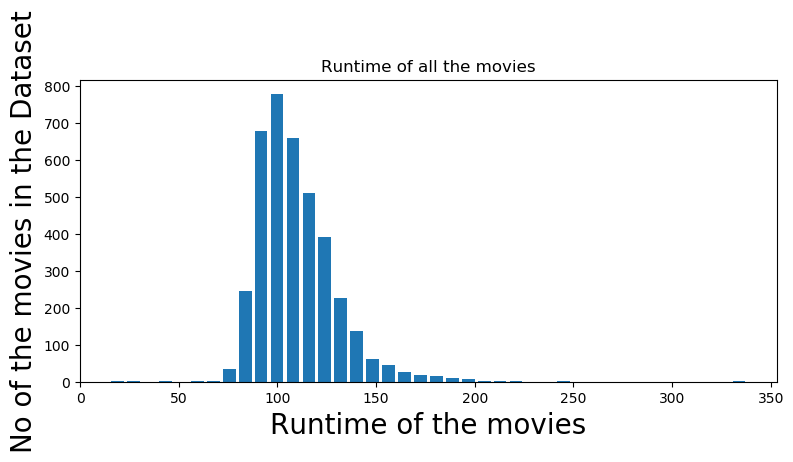

In [20]:
#Visualising the avg runtime through histogram
plt.figure(figsize=(9,4),dpi=100)
#on X-axis
plt.xlabel('Runtime of the movies',fontsize=20)
plt.ylabel('No of the movies in the Dataset',fontsize=20)
plt.title("Runtime of all the movies")
plt.hist(data['runtime'],rwidth=.8,bins=40)
plt.show()

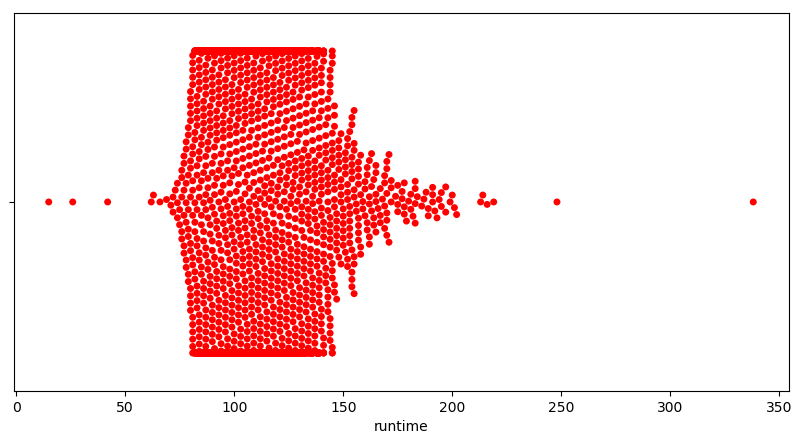

In [25]:
#The second plot is the plot of points of runtime of movies
plt.figure(figsize=(10,5),dpi=100)
sns.swarmplot(data['runtime'],color='red')
plt.show()

In [26]:
print(data['runtime'].describe())

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64


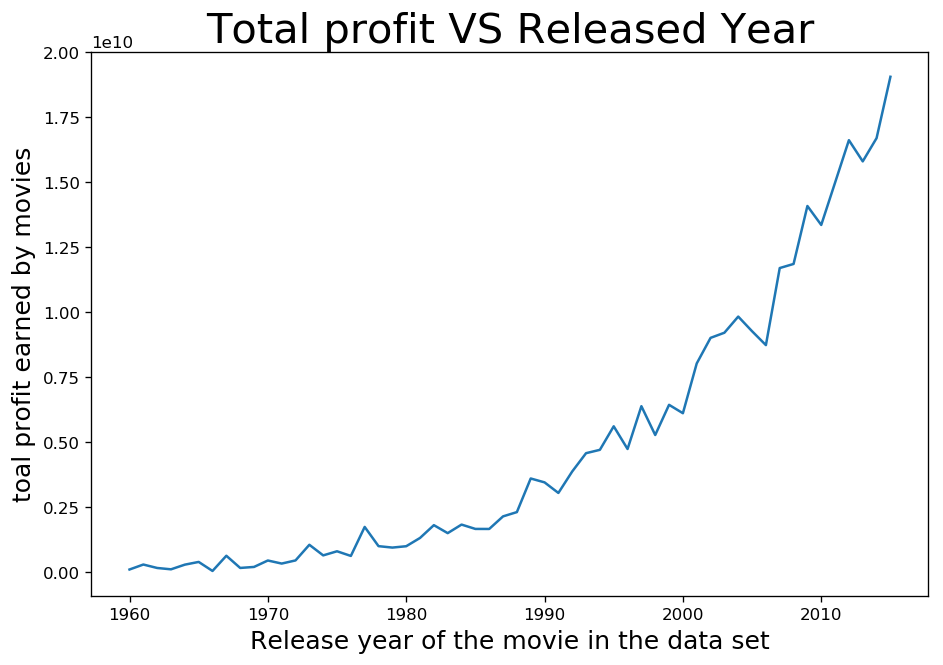

In [27]:
#Year of release Vs profitability
total_profit=data.groupby('release_year')['profit'].sum()
plt.figure(figsize=(9,6),dpi=120)
plt.xlabel('Release year of the movie in the data set',fontsize=15)
plt.ylabel("toal profit earned by movies",fontsize=15)
plt.title("Total profit VS Released Year",fontsize=25)
plt.plot(total_profit)
plt.show()

In [28]:
#To find which year made the highest profit
print(total_profit.idxmax())

2015


In [30]:
#Here we are considering only those movies who have earned more than $40M
profit_list=data[data['profit']>=40000000]
profit_list.index=profit_list.index+1
profit_list.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [31]:
#counting total number of rows in our new dataset
print(len(profit_list))

1493


In [54]:
#Q.6 succesful genres
def successful_genres(krishna):
    x=profit_list[krishna].str.cat(sep='|')
    x=pd.Series(x.split('|'))
    count=x.value_counts(ascending=False)
    return(count)


In [53]:
count=successful_genres('genres')
print(count.head(5))

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64


In [55]:
#Q.7 Most frequent cast
count=successful_genres('cast')
print(count.head(5))

Tom Cruise            27
Tom Hanks             26
Brad Pitt             25
Cameron Diaz          22
Sylvester Stallone    21
dtype: int64


In [60]:
# Function which return avg
def aver(krishna):
    return(profit_list[krishna].mean())

In [61]:
#Q.8 Average Budget of the movie
print(aver('budget'))

57308877.08305425


In [62]:
#Q.9 Average revenue earned by the movie
print(aver('revenue'))

236306323.37374413


In [63]:
#Q.10 average duration of the movie
print(aver('runtime'))

113.19624916275954
